In [ ]:
#Loading the MNIST dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
#Load Dataset
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [ ]:
# normalize to range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# One Hot Encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Define Sequential Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit Model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8585 - loss: 0.4840 - val_accuracy: 0.9572 - val_loss: 0.1497
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9635 - loss: 0.1232 - val_accuracy: 0.9691 - val_loss: 0.1082
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9757 - loss: 0.0778 - val_accuracy: 0.9686 - val_loss: 0.1006
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9823 - loss: 0.0558 - val_accuracy: 0.9718 - val_loss: 0.0962
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9868 - loss: 0.0418 - val_accuracy: 0.9716 - val_loss: 0.0955


In [ ]:
# Print Test Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9686 - loss: 0.1062
Test accuracy: 0.9722999930381775


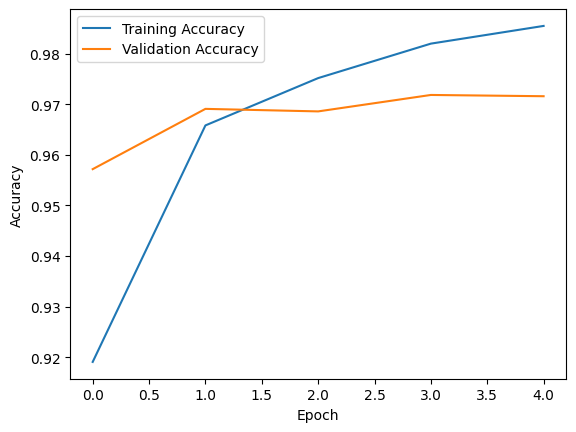

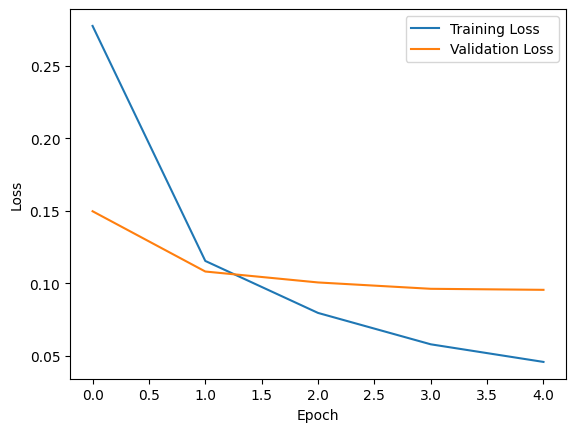

In [ ]:
import matplotlib.pyplot as plt

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()